In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from google.colab import drive

# Assuming 'your_data.csv' is your dataset file
drive.mount('/content/drive')
data = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/mod_nor_constant_c.csv')

X = data.iloc[:, :-1]  # 마지막 열을 제외한 모든 열
y = data.iloc[:, -1]   # 마지막 열


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


feature importance

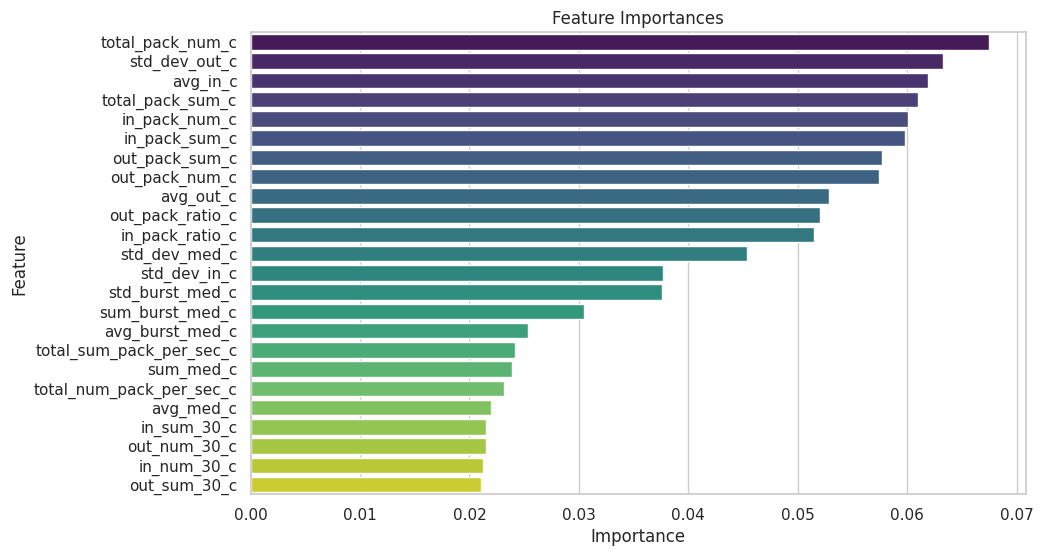

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Calculate and print feature importances
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display feature names and importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the results
#print('\nFeature Importances:')
#print(feature_importance_df)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

# Set the title and labels
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Show the plot
plt.show()

튜닝 전 - all

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = rf_model.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7223684210526315


튜닝 후 - all

In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Print the best parameters
print(f"Best Parameters: {best_params}")

# Predict using the best model
y_pred = best_rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.723421052631579


튜닝 전 - feature drop

In [ ]:
# Select top 11 features
top_features = feature_importance_df.head(22)['Feature'].tolist()

# Use only the top 11 features
X_top = X[top_features]

# Split the data into training and testing sets
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)


# 랜덤 포레스트 모델 생성 및 학습
rf_model_top = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_top.fit(X_train_top, y_train)

# 테스트 데이터로 예측
y_pred_top = rf_model_top.predict(X_test_top)

# 정확도 출력
accuracy_top = accuracy_score(y_test, y_pred_top)
print(f'Accuracy: {accuracy_top}')

Accuracy: 0.7315789473684211


튜닝 후 - feature drop

In [ ]:
# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier
rf_model_top = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search_top = GridSearchCV(estimator=rf_model_top, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search_top.fit(X_train_top, y_train)

# Get the best parameters and model
best_params_top = grid_search_top.best_params_
best_rf_model_top = grid_search_top.best_estimator_

# Print the best parameters
print(f"Best Parameters: {best_params_top}")

# Predict using the best model
y_pred_top = best_rf_model_top.predict(X_test_top)

# Calculate accuracy for the top features
accuracy_top = accuracy_score(y_test, y_pred_top)
print(f'Accuracy: {accuracy_top}')

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.7410526315789474
